# Predict House Price - Advanced Regression Techniques

In [43]:
!pip install scikit-learn



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 25.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/11.0 MB 21.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 20.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/11.0 MB 21.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.0 MB 20.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 20.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.7/11.0 MB 21.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.0 MB 21.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 21.8 MB/s eta 0:00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


%matplotlib inline
sns.set_style('darkgrid')

In [3]:
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')

# Seperate dependent and independent variable
X_train = train_data.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']

# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

In [6]:
print("Train data : ", X_train.shape)
print("Test data : ", test_data.shape)

Train data :  (1460, 79)
Test data :  (1459, 79)


In [9]:
numerical = [col for col in X_train.columns if X_train[col].dtype != 'object']
print(f"There are {len(numerical)} numerical variables:\n", numerical)
print('\n')
categorical = [col for col in X_train.columns if X_train[col].dtype == 'object']
print(f"There are {len(categorical)} categorical variables:\n", categorical)

There are 36 numerical variables:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


There are 43 categorical variables:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Function

# Exploratory Data Analysis

## 2.1 numerical variables

In [13]:
corr_mat = train_data.corrwith(train_data['SalePrice']).sort_values(ascending=False)
corr_mat.head(10)

ValueError: could not convert string to float: 'RL'

Using the [Recursive Features Elimination](https://link-url-here.org)
 (REF) with a linear regression seector I will select the top 10 variables that are significant. 

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression estimator
estimator = LinearRegression()

# Initialize RFE selector
rfe = RFE(estimator, n_features_to_select=10, step=1)

# Fit RFE selector to training data
rfe.fit(X_train.select_dtypes(exclude='object').fillna(0), y_train)

# Get selected features
selectedVar = list(X_train.select_dtypes(exclude='object').columns[rfe.support_])
selectedVar


['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

From the above analyses, I observe that **Overall Quality, GrLivArea, Number of Full Baths, Size of Garage and Year Built** are the most important variables in determining house price. Now lets explore them further

### OveralQual

Text(0.5, 1.0, 'House Price vs Overall Quality')

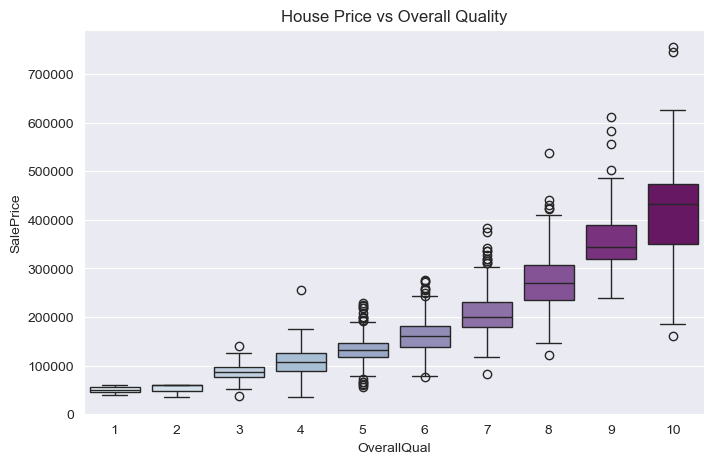

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='BuPu')
plt.title('House Price vs Overall Quality')

### GrLivArea

In [44]:
# Create jointplot
plt.figure(figsize=(8, 5))
sns.jointplot(train_data['GrLivArea'],
              train_data['SalePrice'],
              data=train_data,
              kind='reg',
              height=7)

TypeError: jointplot() got multiple values for argument 'data'

<Figure size 800x500 with 0 Axes>

In [33]:
correlation = train_data[['GrLivArea', 'SalePrice']].corr().iloc[1, 0]
print("Correlation: ", correlation)

Correlation:  0.7086244776126515


We can see that GrLivArea and SalePrice has linear relationship.There are also 2 outliers that have Living Area greater than 4000 but with price lower than $200000 

### GarageCars

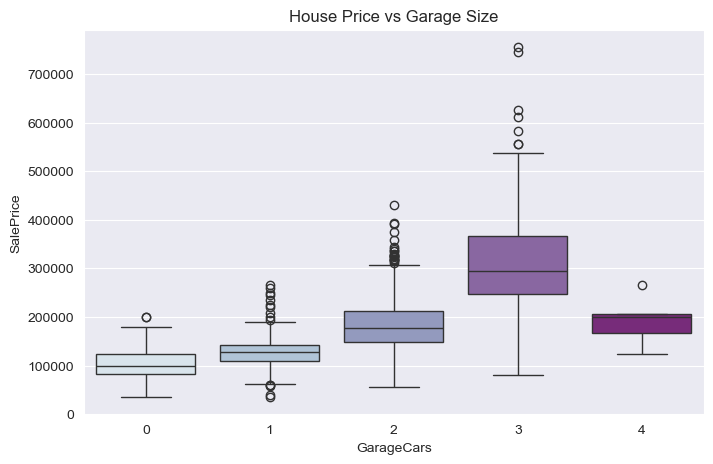

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='BuPu')
title = plt.title('House Price vs Garage Size')

### YearBuilt

In [40]:
# Create jointplot
plt.figure(figsize=(8, 5))
sns.jointplot(train_data['YearBuilt'],
              train_data['SalePrice'],
              kind='reg',
              height=7)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 800x500 with 0 Axes>

This is an interesting insights, house price and YearBuilt have a linear relationship. Newer houses have higher sale price than old houses. However, there are also some houses built before 1900 that have high prices.

## 2.2 Categorical Variables

I will focus specifically to this variable because I think they are significant

In [ ]:
sigCat = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

### neighborhood

In [ ]:
# Create box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x= 'Neighborhood',
            y='SalePrice',
            data=train_data,
            order = train_data.groupby('Neighborhood').median().SalePrice.sort_values(ascending=False).index,
            palette='BuPu')
title =plt.title('House Price vs Neighborhood')
tick =plt.xticks(rotation=45)

The top 3 most expensive neighborhoods are NridgHt, NoRidge and StoneBr with median house prices of approximately $300000, three times as high as the median of the 3 cheapest neighborhoods, which are BrDale, DOTRR and MeadowV.

### RoofMatl

In [ ]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x= 'RoofMatl',
            y='SalePrice',
            data=train_data,
            order = train_data.groupby('RoofMatl').median().SalePrice.sort_values(ascending=False).index,
            palette='BuPu')
title =plt.title('House Price vs RoofMatl')

Houses using Wood Shingles roof are the most expensive with price ranging from $300000 to $450000.

### Kitchen Quality

In [ ]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x= 'KitchenQual',
            y='SalePrice',
            data=train_data,
            order = train_data.groupby('KitchenQual').median().SalePrice.sort_values(ascending=False).index,
            palette='BuPu')
title =plt.title('House Price vs KitchenQual')

 the average price difference between a house with a good kitchen and one with an excellent kitchen is about $120000.

## 2.3 Exporing Sale Price

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(y_train)
plt.title("House Price Distribution")
print(f"""Skewness: {y_train.skew()}
Kurtosis: {y_train.kurt()}""")

Sale Price has a RIght-Skewed distribution with house prices ranging around $200000

## 2.4 Exporing Correlation

In [ ]:
cor_matrix = train_data.corr()

# Filter out variables with correlations greater than 0.5
highcor_matrix = cor_matrix[abs(cor_matrix) >= 0.5]

# Heat Map
plt.figure(figsize=(15, 10))
sns.heatmap(highcor_matrix,
            annot=True,
            fmt='.1f',
            cmap='BuPu',
            vmin=0.5,
            vmax=1)
plt.title('House PriceHeatmap')

Here are the highly correlated variables

- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd

However, the data exhibits some multicollinearity, which will potenetially have negative impacts on our prediction models and makes standard errors of our estimates larger.
Therefore, for each pair of highly correlated features, I will remove a feature that has a lower correlation with SalePrice.

# Feature Engineering

## 3.1 Handling Missing Value

In [ ]:
missing_data_count = X.isnull().sum()
missing_data = pd.DataFrame({
    'Count': missing_data_count})

missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)
missing_data.head(10)

In [ ]:
print(f"There are {len(missing_data)} variables having NaN value.\n")

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(10).index,
            x=missing_data.head(10).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")


To handle missing values, I will divide the list of variables above into three groups like below:

**Group 1 - Categorical variables:** `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType` (15 variables)
   
I will replace `NA` with `'None'` for this group
    
**Group 2 - Numerical variables where `NA` means no feature:** `GarageArea`, `GarageCars`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, `BsmtHalfBath`, `MasVnrArea` (10 variables)
I will replace `NA` with `0`for this group
    
**Group 3 - Other variables:** `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities`, `LotFrontage`, `GarageYrBlt` (9 variables)
I will replace missing value from `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities` with their most frequent value,
`LotFrontage` with its *mean* and`GarageYrBlt` with `YearBuilt`.

In [ ]:
from sklearn.impute import SimpleImputer
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[group_1] = X[group_1].fillna("None")

group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

X[group_2] = X[group_2].fillna(0)

group_3 = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

for col in group_3:
    mode_val = X[col].mode()[0]  # Get the mode (most frequent value) for each column
    X[col].fillna(mode_val, inplace=True)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

In [ ]:
sum(X.isnull().sum())

# Feature Engineering

## 3.2 Handling Outliers

As regression models are very sensitive to outlier, we need to handle it like a pro. From the scatter plot `GrLivArea vs Price` above, we observe 2 outliers lying separately from the rest. They have large living area but low price which are extremely rare, therefore I will remove them from the training set.

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Price vs. Living Area')

In [ ]:
#outlier_idx = train_data[(train_data.GrLivArea > 4000) & (train_data.SalePrice < 200000)].index
#X.drop(outlier_idx, axis=0, inplace=True)
#y_train.drop(outlier_idx, axis=0, inplace=True)

outlier_idx = train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 200000)].index

# Filter outlier_idx to include only valid indices
outlier_idx = [idx for idx in outlier_idx if idx in X.index and idx in y_train.index]

# Drop rows with outlier indices from both X and y_train
X = X.drop(outlier_idx, axis=0)
y_train = y_train.drop(outlier_idx, axis=0)
train_data = train_data.drop(outlier_idx, axis=0)


## 3.3 New variables

It can be observed that the surface area of each floor has low correlation with house price; however, when we sum them up, the relationship becomes much stronger. Therefore, I will create a range variables below.

In [ ]:
# total square feet
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
# total bathrooms
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
# age of the house
X['houseAge'] = X.YrSold - X.YearBuilt
# How new the house is relative to the time is was built
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)
# Is the house remodeled?
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)


In [ ]:
X

I will use One-Hot encoding for these below catgorical variables using LabelEncoder()
For numerical variables that without any ordinal meaning (e.g. `MoSold`, `MSSubClass` and `YrSold`). I will also transform them into categorical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# categorical variables
encoder_vars = [
    "BsmtFinType1", "BsmtFinType2","BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual","Alley", "BsmtCond", "BsmtExposure",  "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]
label_encoder = LabelEncoder()
for var in encoder_vars:
    X[var] = label_encoder.fit_transform(X[var])
    

#Transform numerical variables
to_categorical = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_categorical:
    X[col] = X[col].apply(str)

## 3.4 Normalizing Variables 

Since linear regression relies on the assumption of normal distribution. Transfoming skewed data will help our models perform better.

Here I will examine our varaibles using Distribution plot and Q-Q plot.

In [ ]:
from scipy import stats
from scipy.stats import norm

# Write function to plot Distribution and QQ-plot
def norm_plot(X):
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

In [ ]:
norm_plot(y_train)

The data seems to be right-skewed, so I will use Log() to transform data.
Since nartural log of 0 is NaN, I will use Log(X+1)

In [ ]:
y_train = np.log(1 + y_train)
norm_plot(y_train)

Now the distribution of the dependent variable is normal, I will examine other variables.
First I will rank the features based on their level of skewness

In [ ]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

For variable with skewness less than -1 or greater than 1, the distribution is **highly skewed**. The appropriate range is -0.5 to 0.5, I will transform all variables with skewness that excess this range.

In [ ]:
skewed = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed = [
    col for col in skewed if col not in ['MSSubClass', 'SalePrice']
]
for col in skewed:
    X[col] = np.log(1 + X[col])

In [ ]:
norm_plot(X['GrLivArea'])

Looks good!

## 3.5 Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
num_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
#One hot Encoding
X = pd.get_dummies(X, drop_first=True)

Now I will split X into a train a test set to start modelling

In [ ]:
len_test = len(test_data)
X_train = X.iloc[:-len_test, :]
X_test = X.iloc[-len_test:, :]
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# 4. Modeling 

It's a common practice to split the entire data into train and test sets. However, although a model may work very well on a set of test data, it still performs poorly on other sets of unseen data.

To solve this problem I will utilize a method called [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) (CV). Here, the training set is split into `n` smaller sets. Then, for each fold, a model is trained using the other `n-1` folds and evaluated on the remaining fold. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400" height="200" alt="CV">


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## 4.1 Ridge Regression

FOllow the formular below
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$
As the model's parameter increase, Ridge regression introduce a small penalty to the model, therefore making a more stable long-term prediction.
Ridge Regression depends on the parameter $\lambda$, so I will use LambdaCV to obtain that parameter.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
pip install --upgrade numpy scipy scikit-learn


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV

Ridge_predictor = RidgeCV(cv=30)
Ridge_predictor.fit(X_train,y_train)
print("Ridge Lambda: {0}".format(Ridge_predictor.alpha_))

In [ ]:
ridge = Ridge(alpha=10.0)

## 4.2 Lasso Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV

lasso_predictor = LassoCV(cv=10)
lasso_predictor.fit(X_train,y_train)
print("lasso Lambda: {0}".format(lasso_predictor.alpha_))

In [ ]:
lasso = Lasso(alpha=0.0006)

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

class AvgModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [ ]:
avg_model = AvgModel(models=(ridge, lasso))
avg_model

## Conclusion

In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I train regularized regression models (Ridge, Lasso), XGBoost and LightGBM, and take average predictions from these models to predict final price of each house